# Top Earners in the Movie Industry

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose the IMDB movie dataset. I've wanted to know how much the different movie genres, directors and production companies have grossed over a period of time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./imdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

In [4]:
# Drop columns without neccesary information and remove all records with no financial information
df.drop(['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.head()

,budget,revenue,original_title,director,runtime,genres,production_companies,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015


In [5]:
# Drop columns with null values
df.isnull().sum()

budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_year               0
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,budget,revenue,original_title,director,runtime,genres,production_companies,release_year
228,0,0,Racing Extinction,Louie Psihoyos,90,Adventure|Documentary,NaN,2015
259,0,0,Crown for Christmas,Alex Zamm,84,TV Movie,NaN,2015
295,0,0,12 Gifts of Christmas,Peter Sullivan,84,Family|TV Movie,NaN,2015
298,0,0,The Girl in the Photographs,Nick Simon,95,Crime|Horror|Thriller,NaN,2015
328,0,0,Advantageous,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,2015
...,...,...,...,...,...,...,...,...
10804,0,0,Interiors,Woody Allen,93,Drama,NaN,1978
10806,0,0,Gates of Heaven,Errol Morris,85,Documentary,NaN,1978
10816,0,0,The Rutles: All You Need Is Cash,Eric Idle|Gary Weis,76,Comedy,NaN,1978
10842,0,0,Winnie the Pooh and the Honey Tree,Wolfgang Reitherman,25,Animation|Family,NaN,1966


In [7]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,budget,revenue,original_title,director,runtime,genres,production_companies,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015
...,...,...,...,...,...,...,...,...
9802,0,0,The Endless Summer,Bruce Brown,95,Documentary,Bruce Brown Films,1966
9803,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966
9804,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1966
9805,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,1966


# Check datatypes

In [8]:
df.dtypes

budget                   int64
revenue                  int64
original_title          object
director                object
runtime                  int64
genres                  object
production_companies    object
release_year             int64
dtype: object

#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

#### One `production_companies` per record

In [9]:
row = df.iloc[9802]

row.production_companies

'Bruce Brown Films'

In [10]:
prod_records = df[df.production_companies.str.contains('\|')]
prod_records.production_companies = prod_records.production_companies.apply(lambda x: x.split('|'))



C:\Users\bstan\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df_pc = pd.DataFrame(columns=df.columns)
for i in range(len(prod_records)):
    record = prod_records.iloc[i]
    for prod_company in record.production_companies:
        df_pc = df_pc.append(pd.DataFrame([
            [record.budget, record.revenue, record.original_title, record.director, record.runtime, record.genres, prod_company, record.release_year]
        ], columns=df.columns))
        
df_pc.drop('genres', axis=1, inplace=True)
df_pc.reset_index(drop=True, inplace=True)

df_pc.head()

,budget,revenue,original_title,director,runtime,production_companies,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios,2015
1,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Amblin Entertainment,2015
2,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Legendary Pictures,2015
3,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Fuji Television Network,2015
4,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Dentsu,2015


In [15]:
df_pc.production_companies.value_counts()

Warner Bros.                              425
Universal Pictures                        389
Paramount Pictures                        275
Twentieth Century Fox Film Corporation    233
Columbia Pictures                         200
                                         ... 
Dark Harbor Stories                         1
Stardust Pictures                           1
SevenPictures                               1
MindSmack Productions                       1
Traverse Media                              1
Name: production_companies, Length: 7071, dtype: int64

#### One `genres` per record

In [12]:
genre_records = df[df.genres.str.contains('\|')]
genre_records.genres = genre_records.genres.apply(lambda x: x.split('|'))

df_g = pd.DataFrame(columns=df.columns)
for i in range(len(genre_records)):
    record = genre_records.iloc[i]
    for genre in record.genres:
        df_g = df_g.append(pd.DataFrame([
            [record.budget, record.revenue, record.original_title, record.director, record.runtime, genre, record.production_companies, record.release_year]
        ], columns=df.columns))
        
df_g.drop('production_companies', axis=1, inplace=True)
df_g.reset_index(drop=True, inplace=True)

df_g.head()

C:\Users\bstan\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,budget,revenue,original_title,director,runtime,genres,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015
1,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,2015
2,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,2015
3,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,2015
4,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015


In [14]:
df_g.genres.value_counts()

Drama              3732
Comedy             2823
Thriller           2660
Action             2179
Romance            1565
Adventure          1363
Crime              1297
Horror             1295
Science Fiction    1111
Family             1093
Fantasy             833
Mystery             770
Animation           608
Music               325
History             307
War                 254
Western             142
Documentary         135
TV Movie            131
Foreign             120
Name: genres, dtype: int64

## CHECKPOINT

In [17]:
df.to_csv('./imdb-movies_v2.csv', index=False)

In [18]:
df_pc.to_csv('./movie_prod_company_v1.csv', index=False)
df_g.to_csv('./movie_genre_v1.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Which production companies released the most movies in the last 10 years? Display the top 10 production companies.

In [27]:
df_pc_10 = df_pc.query('release_year >= 2005').production_companies.value_counts().nlargest(10)
df_pc_10

Universal Pictures                        153
Warner Bros.                              133
Relativity Media                          103
Columbia Pictures                          97
Paramount Pictures                         93
Twentieth Century Fox Film Corporation     82
Walt Disney Pictures                       68
New Line Cinema                            65
BBC Films                                  62
Canal+                                     58
Name: production_companies, dtype: int64

In [28]:
df_pc_10.index

Index(['Universal Pictures', 'Warner Bros.', 'Relativity Media',
       'Columbia Pictures', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Walt Disney Pictures',
       'New Line Cinema', 'BBC Films', 'Canal+'],
      dtype='object')

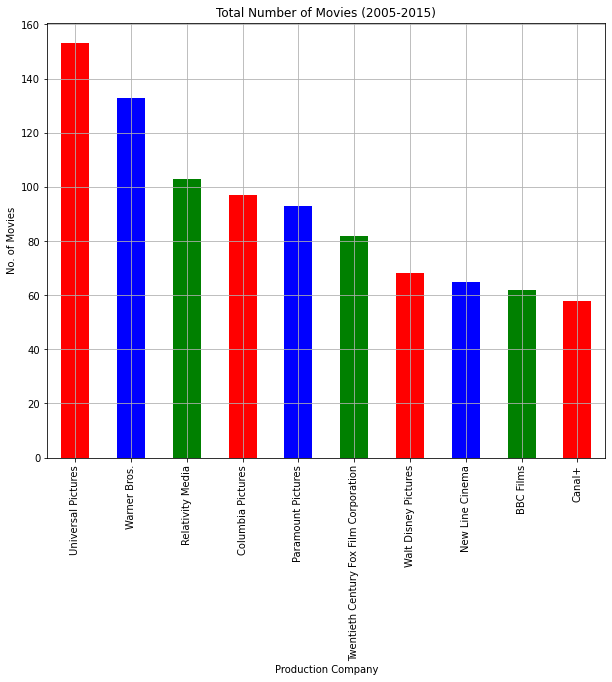

In [88]:
df_pc_10.plot(kind='bar', x=df_pc_10.index, y=df_pc_10, figsize=(10,8), grid=True, color=['r', 'b', 'g'], rot=90)
plt.title('Total Number of Movies (2005-2015)')
plt.xlabel('Production Company')
plt.ylabel('No. of Movies');

### What 10 production companies grossed the highest all-time?

In [92]:
df_pc_rev_10 = df_pc.groupby('production_companies').revenue.sum().nlargest(10)/1e9
df_pc_rev_10

production_companies
Warner Bros.                              52.150875
Universal Pictures                        44.342571
Twentieth Century Fox Film Corporation    35.312837
Paramount Pictures                        33.251445
Walt Disney Pictures                      29.533827
Columbia Pictures                         24.679798
New Line Cinema                           18.095694
Amblin Entertainment                      15.954216
DreamWorks SKG                            14.742442
Relativity Media                          13.316859
Name: revenue, dtype: float64

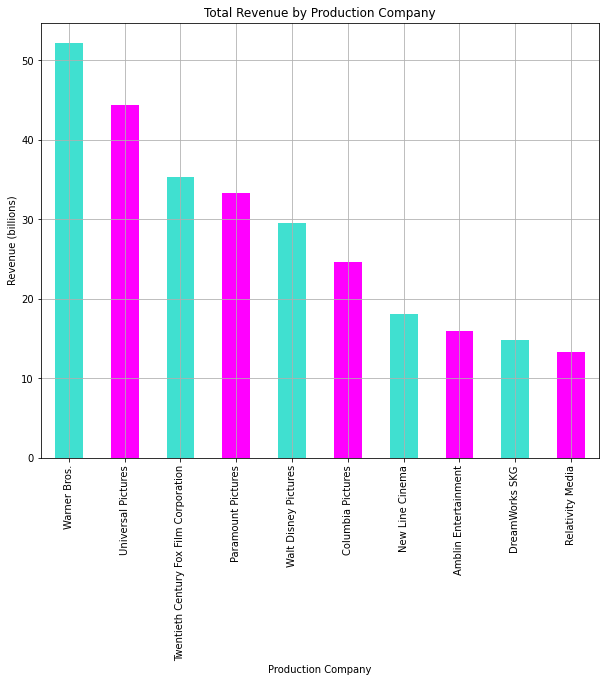

In [96]:
df_pc_rev_10.plot(kind='bar', x=df_pc_rev_10.index, y=df_pc_rev_10, figsize=(10,8), grid=True, color=['turquoise', 'fuchsia'])
plt.title('Total Revenue by Production Company')
plt.xlabel('Production Company')
plt.ylabel('Revenue (billions)');

### What 5 movie genres grossed the highest all-time?

In [59]:
genre_revenues = df_g.groupby('genres')['revenue'].sum().sort_values(ascending=False)[:5]/1e9
genre_revenues

genres
Action       171.086939
Adventure    165.363041
Drama        123.798321
Comedy       121.823080
Thriller     120.296413
Name: revenue, dtype: float64

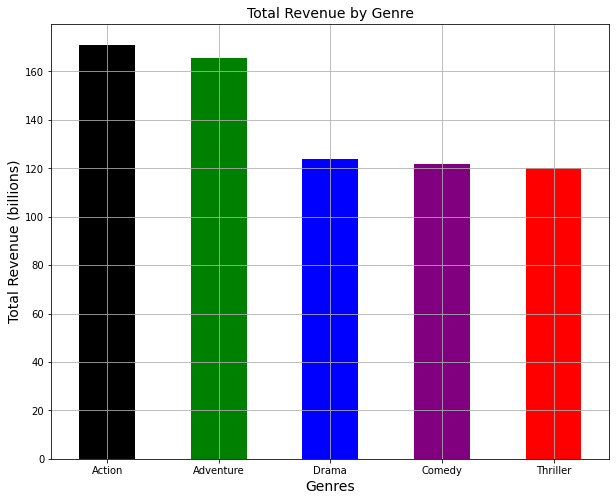

In [65]:
genre_revenues.plot(kind='bar', x=genre_revenues.index, y=genre_revenues, figsize=(10,8), grid=True, rot=0, color=['black', 'green', 'blue', 'purple', 'red'])
plt.title('Total Revenue by Genre', fontsize=14)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Total Revenue (billions)', fontsize=14);

### Who are the top 10 grossing directors?

In [70]:
director_revenue = df.groupby('director').revenue.sum().nlargest(10)/1e9
director_revenue

director
Steven Spielberg     9.018564
Peter Jackson        6.523245
James Cameron        5.841895
Michael Bay          4.917208
Christopher Nolan    4.167549
David Yates          4.154296
Robert Zemeckis      3.869691
Chris Columbus       3.851492
Tim Burton           3.665415
Ridley Scott         3.649996
Name: revenue, dtype: float64

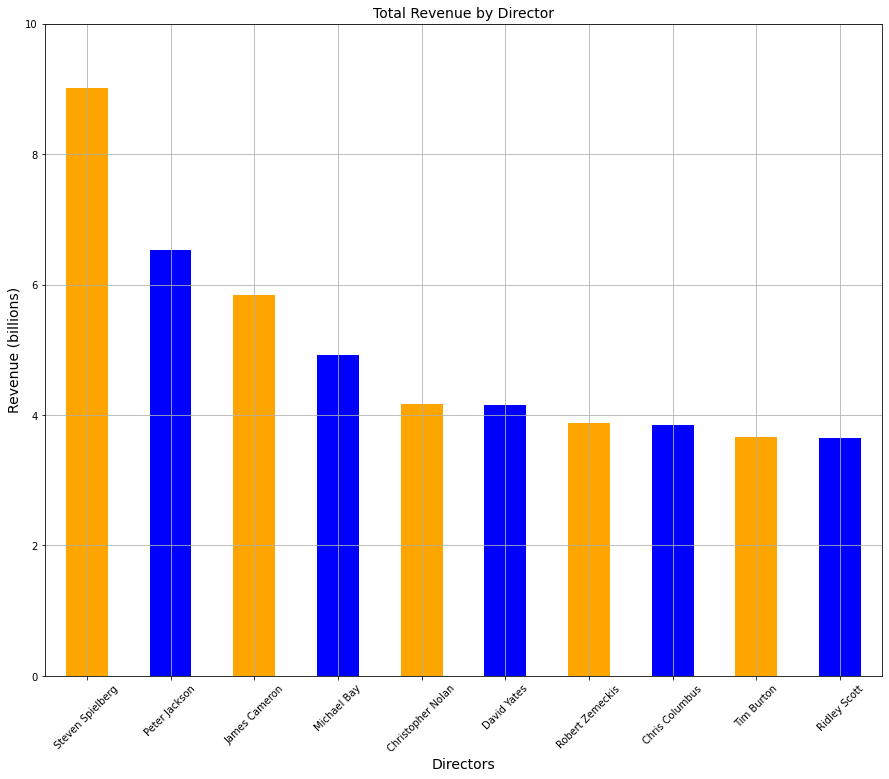

In [74]:
director_revenue.plot(kind='bar', x=director_revenue.index, y=director_revenue, figsize=(15, 12), grid=True, color=['orange', 'b'], rot=45)
plt.title('Total Revenue by Director', fontsize=14)
plt.xlabel('Directors', fontsize=14)
plt.ylabel('Revenue (billions)', fontsize=14)
plt.yticks(ticks=[i*2 for i in range(6)]);

### Compare the revenue of the highest grossing movies of all time.

In [84]:
movie_revenue = df.groupby('original_title').revenue.max().nlargest(10)/1e9
movie_revenue

original_title
Avatar                                          2.781506
Star Wars: The Force Awakens                    2.068178
Titanic                                         1.845034
The Avengers                                    1.519558
Jurassic World                                  1.513529
Furious 7                                       1.506249
Avengers: Age of Ultron                         1.405036
Harry Potter and the Deathly Hallows: Part 2    1.327818
Frozen                                          1.274219
Iron Man 3                                      1.215440
Name: revenue, dtype: float64

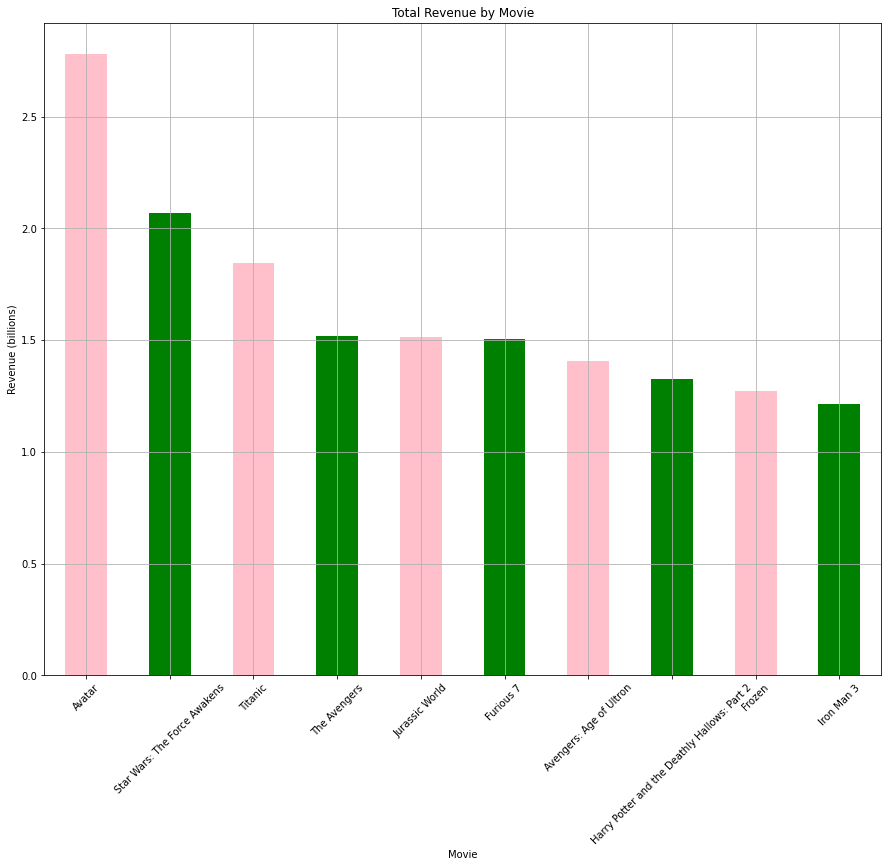

In [87]:
movie_revenue.plot(kind='bar', x=movie_revenue.index, y=movie_revenue, figsize=(15,12), grid=True, color=['pink', 'green'], rot=45)
plt.title('Total Revenue by Movie')
plt.xlabel('Movie')
plt.ylabel('Revenue (billions)');

<a id='conclusions'></a>
## Conclusions

* Avatar is the highest-grossing movie of all time.

* Steven Spielberg is the highest-grossing director of all time.

* Action movies (not to my surprise) are the highest-grossing movies..

* Disney is not one of the top 5 production companies in terms of movie output during the last 10 years.